In [13]:
import pandas as pd
import numpy as np

In [14]:
# list current working directory
! ls

LICENSE                     hyperparameter tuning.ipynb
README.md                   models.py
__pycache__                 parse.py
data                        reviews
exploratory_analysis.ipynb


In [15]:
! cat parse.py

import uuid

import pandas
import requests


# Read in a csv file from a given path
def get_data(filepath):
    df = pandas.read_csv(filepath)
    return df


# Replace all nan values in a column with a value or statistic
def replace_nan(df, col, is_percent=False, is_categorical=False):
    if df[col].isnull().values.any():
        print("Removing NaNs from: ", col)
        if is_percent:
            df[col] = df[col].apply(percent_to_num)
            print(df[col].mean())
            df[col].fillna(df[col].mean(), inplace=True)
        if is_categorical:
            print(df[col].mode()[0])
            df[col].fillna(df[col].mode()[0], inplace=True)


# prints columns that contain NaNs
def nan_checker(df):
    count = 0
    for col in list(df):
        if df[col].isnull().values.any():
            count += 1
            print("HAS NANS: ", col)
    if not count:
        print("Columns are NaN free!!!!!!")


# Convert string to integer and return the integer
def percent_to_num(x):
    

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.kernel_ridge import KernelRidge
from parse import *

In [17]:
data = get_processed_data()

HAS NANS:  host_response_time
HAS NANS:  host_response_rate
HAS NANS:  host_acceptance_rate
HAS NANS:  beds
Removing NaNs from:  host_response_rate
94.95238095238095
Removing NaNs from:  host_acceptance_rate
92.05413804383383
Removing NaNs from:  host_response_time
within an hour
Removing NaNs from:  beds
1.0
Columns are NaN free!!!!!!
{'a few days or more': 0, 'within a few hours': 1, 'within a day': 2, 'within an hour': 3}
{'t': 0, 'f': 1}
{'t': 0, 'f': 1}
{'Condominium': 0, 'Bed & Breakfast': 1, 'Bungalow': 2, 'Townhouse': 3, 'Camper/RV': 4, 'Dorm': 5, 'Yurt': 6, 'Villa': 7, 'House': 8, 'Treehouse': 9, 'Boat': 10, 'Loft': 11, 'Other': 12, 'Apartment': 13, 'Entire Floor': 14, 'Chalet': 15, 'Tent': 16, 'Cabin': 17, 'Guesthouse': 18}
{'Shared room': 0, 'Entire home/apt': 1, 'Private room': 2}
{'Futon': 0, 'Pull-out Sofa': 1, 'Real Bed': 2, 'Couch': 3, 'Airbed': 4}
{'flexible': 0, 'moderate': 1, 'strict': 2, 'super_strict_30': 3}
      Unnamed: 0        id  host_response_time  host_resp

In [18]:
data.head()

,Unnamed: 0,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,...,Washer,Indoor Fireplace,Suitable for Events,Pool,Hair Dryer,Iron,translation missing: en.hosting_amenity_49,Buzzer/Wireless Intercom,Gym,verifications_count
0,0,12147973,3,94.952381,92.054138,1,1,1,42.282619,-71.133068,...,1,0,0,0,0,0,0,0,0,4
1,1,3075044,3,100.000000,100.000000,1,1,0,42.286241,-71.134374,...,1,0,0,0,1,1,0,0,0,7
2,2,6976,1,100.000000,88.000000,0,1,0,42.292438,-71.135765,...,1,0,0,0,0,0,1,0,0,4
3,3,1436513,1,100.000000,50.000000,1,1,1,42.281106,-71.121021,...,1,1,0,0,1,1,0,0,1,3
4,4,7651065,3,100.000000,100.000000,0,1,0,42.284512,-71.136258,...,0,0,0,0,1,1,0,0,0,4


In [21]:
# drop 'Unnamed: 0' and 'id'
data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [22]:
data.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,...,Washer,Indoor Fireplace,Suitable for Events,Pool,Hair Dryer,Iron,translation missing: en.hosting_amenity_49,Buzzer/Wireless Intercom,Gym,verifications_count
0,3,94.952381,92.054138,1,1,1,42.282619,-71.133068,8,1,...,1,0,0,0,0,0,0,0,0,4
1,3,100.000000,100.000000,1,1,0,42.286241,-71.134374,13,2,...,1,0,0,0,1,1,0,0,0,7
2,1,100.000000,88.000000,0,1,0,42.292438,-71.135765,13,2,...,1,0,0,0,0,0,1,0,0,4
3,1,100.000000,50.000000,1,1,1,42.281106,-71.121021,8,2,...,1,1,0,0,1,1,0,0,1,3
4,3,100.000000,100.000000,0,1,0,42.284512,-71.136258,8,2,...,0,0,0,0,1,1,0,0,0,4


In [52]:
for c in data.columns:
    print('feature name:', c)
    print('category number:', data[c].value_counts().shape[0], '\n')

feature name: host_response_time
category number: 4 

feature name: host_response_rate
category number: 59 

feature name: host_acceptance_rate
category number: 73 

feature name: host_is_superhost
category number: 2 

feature name: host_total_listings_count
category number: 44 

feature name: host_identity_verified
category number: 2 

feature name: latitude
category number: 7351 

feature name: longitude
category number: 7351 

feature name: property_type
category number: 19 

feature name: room_type
category number: 3 

feature name: accommodates
category number: 15 

feature name: bathrooms
category number: 13 

feature name: bedrooms
category number: 8 

feature name: beds
category number: 13 

feature name: bed_type
category number: 5 

feature name: guests_included
category number: 16 

feature name: minimum_nights
category number: 34 

feature name: cancellation_policy
category number: 4 

feature name: price
category number: 365 

feature name: Family/Kid Friendly
category num

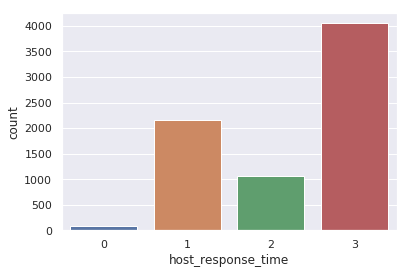

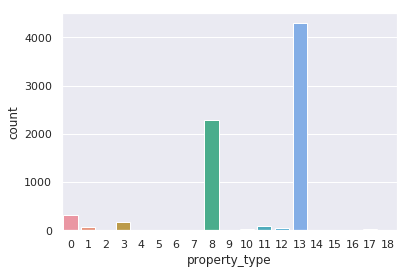

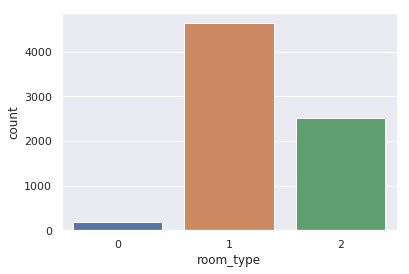

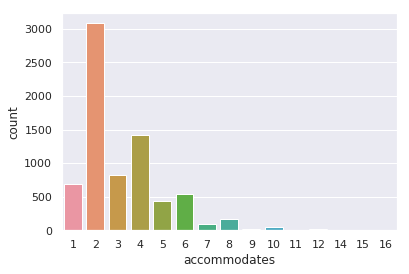

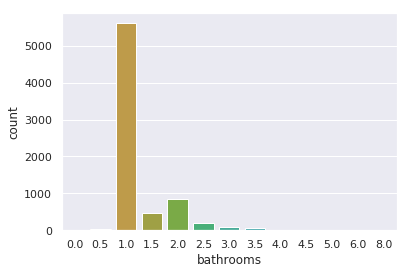

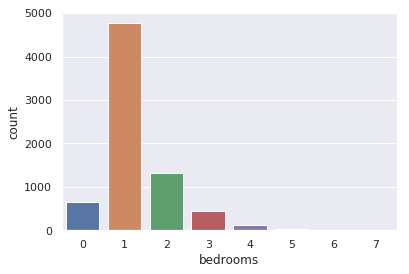

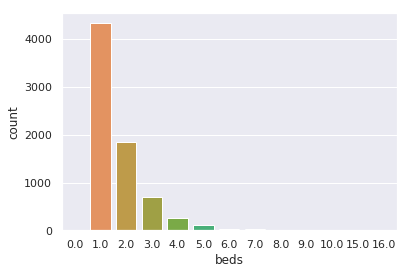

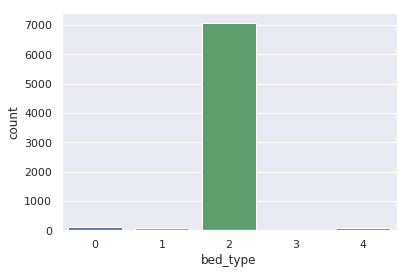

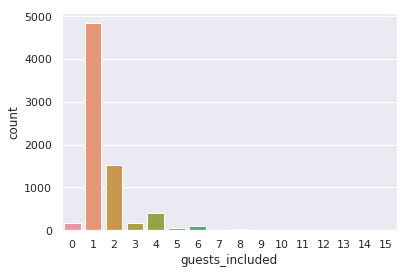

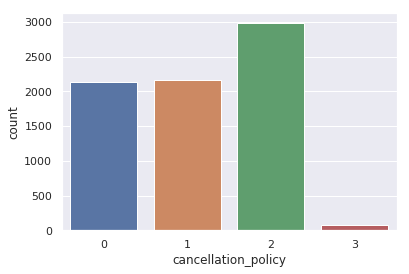

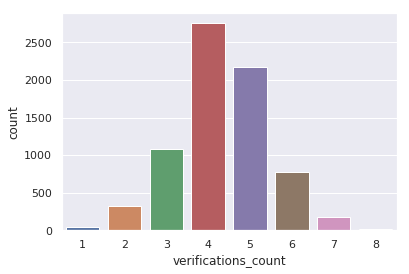

In [51]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

for c in data.columns:
    category_num = data[c].value_counts().shape[0]
    if category_num != 2 and category_num < 20:
        ax = sns.countplot(x=c, data=data)
        plt.show()

In [23]:
y = data['price']
X = data.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X.shape

(7351, 64)

In [26]:
# regularization bench mark
clf = RandomForestRegressor(n_estimators=300, criterion='mae', max_features='sqrt', max_depth=None, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
print('training accuracy:', clf.score(X_train, y_train))
print('test accuracy:    ', clf.score(X_test, y_test))

training accuracy: 0.9116125313428769
test accuracy:     0.6093101281350719


In [28]:
# increase max_features a little bit (increase too much will reduce test accuracy)
clf_trial = RandomForestRegressor(n_estimators=300, criterion='mae', 
                                  max_features=14, max_depth=None, 
                                  n_jobs=-1, oob_score=True)
clf_trial.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features=14, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [29]:
print('training R^2 score:', clf_trial.score(X_train, y_train))
print('test R^2 score:    ', clf_trial.score(X_test, y_test))

training accuracy: 0.917307303979568
test accuracy:     0.6224506513017978
